In [628]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import pandas_profiling
from pandas_profiling import ProfileReport

# Read Data
- https://www.kaggle.com/karthikeyansh55/eda-movie-recommendation-using-plotly (시각화 참고함)

In [629]:
movie = pd.read_csv('netflix.csv', index_col=0)
movie.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [630]:
movie.info()  # 16744개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.2+ MB


In [631]:
pandas_profiling.ProfileReport(movie)

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Data has many nan-values.

In [632]:
movie.isna().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

### Preprocessing

In [633]:
movie = movie.drop(['ID', 'Type'], axis=1)

In [634]:
movie.update(movie[['Age']].fillna('all'))
movie.update(movie[['Directors', 'Genres', 'Country', 'Language']].fillna('Others'))
movie.update(movie[['Runtime']].fillna(93))
movie.update(movie[['IMDb']].fillna(5.91))
movie.update(movie[['Rotten Tomatoes']].fillna('50%'))
movie

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.80,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.70,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.50,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.50,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.80,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,all,6.20,50%,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,The Poof Point,2001,7+,4.70,50%,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,Sharks of Lost Island,2013,all,5.70,50%,0,0,0,1,Neil Gelinas,Documentary,United States,English,93.0
16742,Man Among Cheetahs,2017,all,6.60,50%,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,93.0


In [635]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16744 entries, 0 to 16743
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              16744 non-null  object 
 3   IMDb             16744 non-null  float64
 4   Rotten Tomatoes  16744 non-null  object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Directors        16744 non-null  object 
 10  Genres           16744 non-null  object 
 11  Country          16744 non-null  object 
 12  Language         16744 non-null  object 
 13  Runtime          16744 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.9+ MB


# Visualization on Genres

In [636]:
seperated_genres = movie['Genres'].str.get_dummies(',')
seperated_genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Others,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
16740,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
16741,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16742,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [637]:
genres_count = seperated_genres.sum()
genres_count

Action         2683
Adventure      1778
Animation       711
Biography       821
Comedy         4637
Crime          1833
Documentary    2546
Drama          7227
Family         1514
Fantasy        1089
Film-Noir        79
Game-Show         7
History         715
Horror         2201
Music           667
Musical         401
Mystery        1274
News            105
Others          275
Reality-TV       22
Romance        2359
Sci-Fi         1228
Short           386
Sport           404
Talk-Show        19
Thriller       3354
War             539
Western         499
dtype: int64

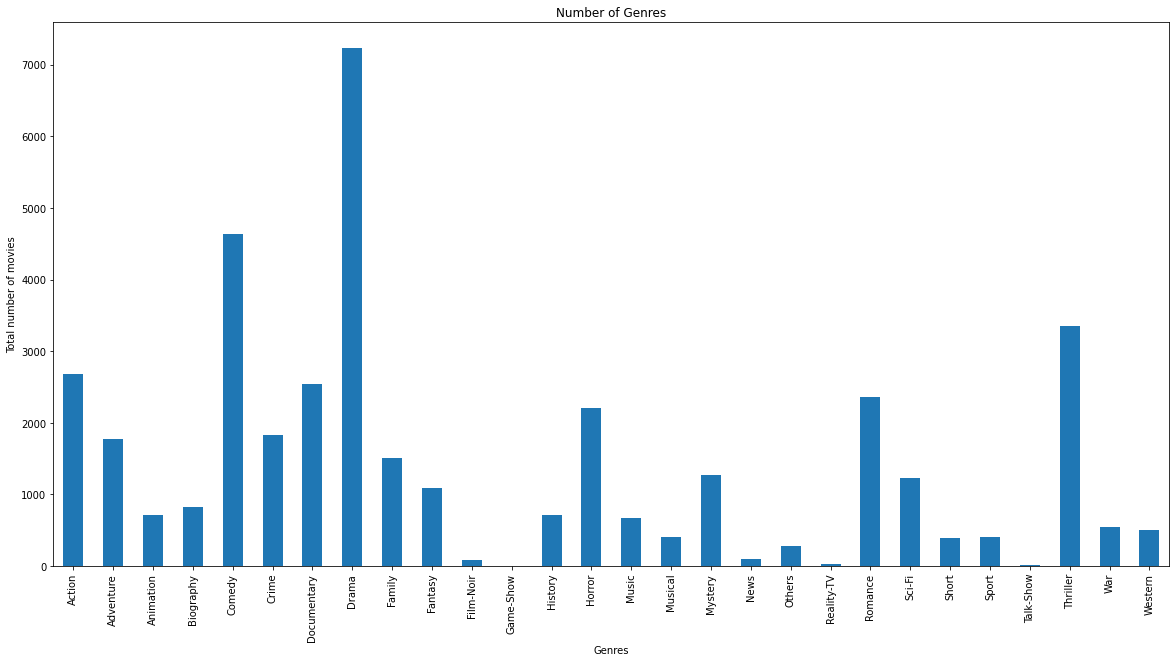

In [638]:
plt.figure(figsize = (20, 10))
genres_count.plot(kind="bar")
plt.ylabel('Total number of movies')
plt.xlabel('Genres')
plt.title('Number of Genres')
plt.show()

# Visualization on OTT Platforms

In [639]:
netflix_count = movie['Netflix'][movie['Netflix'] == 1].count()
hulu_count = movie['Hulu'][movie['Hulu'] == 1].count()
amazon_count = movie['Prime Video'][movie['Prime Video'] == 1].count()
disney_count = movie['Disney+'][movie['Disney+'] == 1].count()
count_list = [netflix_count, hulu_count, amazon_count, disney_count]

labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
count_series = pd.Series(count_list, index = labels)
count_series

Netflix         3560
Hulu             903
Prime Video    12354
Disney+          564
dtype: int64

In [640]:
fig = go.Figure(data=[go.Pie(labels=labels, values=count_series, hole=.4)])
fig.update_layout(title_text = 'Number of movies in platforms')
fig.show()

# IMDb

In [641]:
movie.sort_values(by = 'IMDb', ascending=False).head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
6566,Square One,2019,all,9.3,50%,0,0,1,0,Danny Wu,"Documentary,Drama,Music",United States,English,83.0
1292,My Next Guest with David Letterman and Shah Ru...,2019,all,9.3,50%,1,0,0,0,Others,Talk-Show,Others,Others,61.0
6837,Steven Banks: Home Entertainment Center,1989,all,9.3,50%,0,0,1,0,Tom McLoughlin,Comedy,United States,English,60.0
7426,Bounty,2011,all,9.3,50%,0,0,1,0,Roger Donaldson,"Adventure,Drama,History,Romance","United Kingdom,United States,New Zealand",English,132.0
7220,"Down, But Not Out!",2015,all,9.3,50%,0,0,1,0,Miguel Gaudêncio,"Documentary,Sport",Poland,Polish,68.0


In [642]:
imdb_rating_series = np.round(movie['IMDb'], 0)
imdb_rating_series.value_counts().sort_index()

0.0       4
1.0       7
2.0     241
3.0     660
4.0    1678
5.0    2758
6.0    5744
7.0    3965
8.0    1590
9.0      97
Name: IMDb, dtype: int64

In [643]:
index = list(range(10))
fig = px.bar(x=index, y=imdb_rating_series.value_counts().sort_index(), height = 400, color = index, 
            labels = { 'x' : 'IMDB rating', 'y' : 'Number of movies'})
fig.show()

# Rotten Tomatoes

In [644]:
movie.sort_values(by = 'Rotten Tomatoes', ascending=False).head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
4474,Eighth Grade,2018,18+,7.4,99%,0,0,1,0,Bo Burnham,"Comedy,Drama",United States,English,93.0
16220,Finding Nemo,2003,all,8.1,99%,0,0,0,1,"Andrew Stanton,Lee Unkrich","Animation,Adventure,Comedy,Family","United States,Australia",English,100.0
4854,Rivers and Tides,2001,all,7.9,99%,0,0,1,0,Thomas Riedelsheimer,Documentary,"Germany,Finland,United Kingdom,Canada",English,90.0
142,Starred Up,2013,18+,7.4,99%,1,0,1,0,David Mackenzie,"Crime,Drama",United Kingdom,English,106.0
262,20 Feet from Stardom,2013,13+,7.4,99%,1,0,0,0,Morgan Neville,"Documentary,Biography,Music",United States,"English,Spanish",91.0


In [645]:
tomato_rating = movie.sort_values(by = 'Rotten Tomatoes', ascending=False)

In [646]:
#tomato_rating_series = np.round(movie['Rotten Tomatoes'], 0)
tomato_rating_series = movie['Rotten Tomatoes']
tomato_rating_series#.value_counts().sort_index()

0        87%
1        87%
2        84%
3        96%
4        97%
        ... 
16739    50%
16740    50%
16741    50%
16742    50%
16743    50%
Name: Rotten Tomatoes, Length: 16744, dtype: object

In [647]:
tomato_rating_series = movie['Rotten Tomatoes']
tomato_rating_series = tomato_rating_series.str.replace(pat=r'[^\w]', repl=r'', regex=True)
tomato_rating_series = pd.to_numeric(tomato_rating_series)
tomato_rating_series = np.round(tomato_rating_series, -1)


In [648]:
index = list(range(11))
fig = px.bar(x=index, y=tomato_rating_series.value_counts().sort_index(), height = 400, color = index, 
            labels = { 'x' : 'Rotten Tomatoes rating', 'y' : 'Number of movies'})
fig.show()


### 런타임 순으로 정렬 후 시각화

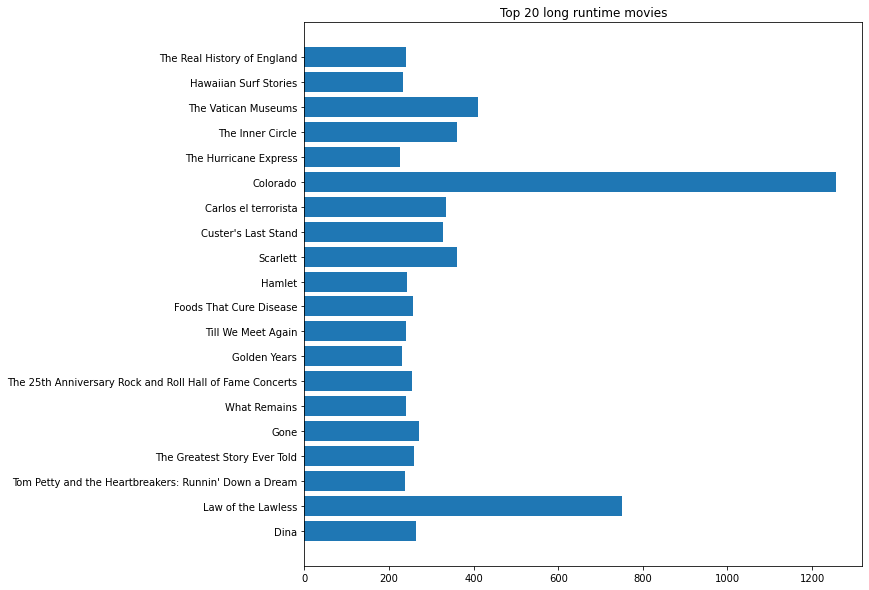

In [649]:
runtime = movie['Runtime'].sort_values(ascending=False).head(20)

x = movie[movie['Runtime'].isin(runtime)]['Title']
y = runtime.sort_index()

plt.figure(figsize=(10,10))
plt.barh(x, y)
plt.title('Top 20 long runtime movies')
plt.show()

### 년도별 영화수

In [650]:
year_movie = pd.cut(movie['Year'], bins=[0,1950,2000,2010,2020], labels=['1900~1950','1950~2000','2000~2010','2010~2020'])
values = year_movie.value_counts().sort_index()

fig = go.Figure(data=[go.Pie(labels=['1900~1950','1950~2000','2000~2010','2010~2020'], values=values, hole=.4)])
fig.update_layout(title_text = '1900 to 2020 total number of movie')
fig.show()

# 'Total number of movies based on country'

In [651]:
movie['Country']

0        United States,United Kingdom
1                       United States
2                       United States
3                       United States
4            Italy,Spain,West Germany
                     ...             
16739                   United States
16740                   United States
16741                   United States
16742                   United States
16743                   United States
Name: Country, Length: 16744, dtype: object

In [652]:
movie.groupby('Country')['Title'].count().reset_index().rename(columns = {'Title':'Number_of_Movies'}).sort_values('Number_of_Movies',ascending = False)

,Country,Number_of_Movies
1060,United States,8776
477,India,1064
909,United Kingdom,905
117,Canada,555
695,Others,435
...,...,...
507,"Ireland,Australia",1
508,"Ireland,Belgium,France,Luxembourg,United Kingdom",1
509,"Ireland,Belgium,United States",1
511,"Ireland,Canada,Luxembourg,United States,United...",1


In [653]:
#'Total number of movies based on country'
top_20 = movie.groupby('Country')['Title'].count().reset_index().rename(columns = {'Title':'Number_of_Movies'})
top_20 = top_20.sort_values('Number_of_Movies',ascending = False).head(20) # 나라별로 분류해서 영화개수로 정렬
fig = px.bar(top_20, x='Country', y='Number_of_Movies', color='Number_of_Movies', height=700,
            title = 'Total number of movies based on country')
fig.show()

# Total Number of movies based on Genres in all the platforms

In [654]:
unique_genres= movie['Genres'].str.get_dummies(',') # 장르를  get_dummies

In [655]:
genre_merged = pd.concat([movie, unique_genres], axis = 1, sort = False)  # 인코딩 된것을 movie에 붙임

In [656]:
genre_merged.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,...,Others,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,...,0,0,0,1,0,0,0,1,0,0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski",...,0,0,0,1,0,0,0,0,0,0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo",...,0,0,0,1,0,0,0,0,0,0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,...,0,0,0,1,0,0,0,0,0,0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,...,0,0,0,0,0,0,0,0,0,1


In [657]:
#Total Number of movies based on Genres in all the platforms
def bar(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]  # 플랫폼 ==1 이 트루인 행을 모아서 dataframe 변수에 넣음 
    val_counts = dataframe.iloc[:,15:].sum(axis=0).sort_values(ascending=False)
    val_counts2 = pd.DataFrame(val_counts,columns=['Number of movies'])
    return val_counts2[0:20].style.bar(subset=["Number of movies",], color=c)

### 'Netflix'

In [658]:
bar(genre_merged, 'Netflix', 'red')

,Number of movies
Drama,1501
Comedy,1308
Thriller,652
Romance,551
Documentary,511
Crime,372
Adventure,318
Family,315
Horror,266
Fantasy,258


### 'Prime Video'

In [659]:
bar(genre_merged, 'Prime Video','#00CC96' )

,Number of movies
Drama,5437
Comedy,3004
Thriller,2632
Documentary,1895
Horror,1878
Romance,1691
Crime,1423
Adventure,1166
Mystery,983
Sci-Fi,907


### 'Hulu'

In [660]:
bar(genre_merged, 'Hulu','#AB63FA' )

,Number of movies
Drama,438
Comedy,272
Thriller,221
Romance,151
Documentary,132
Horror,124
Adventure,111
Family,105
Crime,100
Mystery,86


In [661]:
sorted_by_imdb = movie.sort_values(by = 'IMDb', ascending=False)
netflix_imdb = sorted_by_imdb[sorted_by_imdb['Netflix'] == 1]  # Movies on the 'Netflix'.
netflix_imdb.head()


,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
1292,My Next Guest with David Letterman and Shah Ru...,2019,all,9.3,50%,1,0,0,0,Others,Talk-Show,Others,Others,61.0
947,Natsamrat,2016,all,9.1,50%,1,0,0,0,Mahesh Manjrekar,"Drama,Family",India,Marathi,166.0
0,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
1214,Bill Hicks: Relentless,1992,all,8.7,50%,1,0,0,0,Chris Bould,"Documentary,Comedy",United Kingdom,English,61.0


In [662]:
fig = px.sunburst(netflix_imdb.head(20), 
                  path = ['Genres', 'Title'],
                  values = 'IMDb', color = 'IMDb',
                  color_continuous_scale='twilight')
fig.show()


In [663]:
hulu_imdb = sorted_by_imdb[sorted_by_imdb['Hulu'] == 1]  # Movies on the 'Hulu'.
hulu_imdb.head()


,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
3560,The Dark Knight,2008,13+,9.0,94%,0,1,0,0,Christopher Nolan,"Action,Crime,Drama,Thriller","United States,United Kingdom","English,Mandarin",152.0
3561,GoodFellas,1990,18+,8.7,96%,0,1,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian",146.0
3564,The Green Mile,1999,18+,8.6,78%,0,1,0,0,Frank Darabont,"Crime,Drama,Fantasy,Mystery",United States,"English,French",189.0
3562,Parasite,2019,18+,8.6,99%,0,1,1,0,Bong Joon Ho,"Comedy,Drama,Thriller",South Korea,"Korean,English",132.0
4283,Brad Paisley Thinks He's Special,2019,all,8.5,50%,0,1,0,0,Others,Music,United States,Others,93.0


In [664]:
fig = px.sunburst(hulu_imdb.head(20), 
                  path = ['Genres', 'Title'],
                  values = 'IMDb', color = 'IMDb',
                  color_continuous_scale='twilight')
fig.show()


In [665]:
amazon_imdb = sorted_by_imdb[sorted_by_imdb['Prime Video'] == 1]  # Movies on the 'Prime Video'.
amazon_imdb.head()


,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
6566,Square One,2019,all,9.3,50%,0,0,1,0,Danny Wu,"Documentary,Drama,Music",United States,English,83.0
6837,Steven Banks: Home Entertainment Center,1989,all,9.3,50%,0,0,1,0,Tom McLoughlin,Comedy,United States,English,60.0
7426,Bounty,2011,all,9.3,50%,0,0,1,0,Roger Donaldson,"Adventure,Drama,History,Romance","United Kingdom,United States,New Zealand",English,132.0
7220,"Down, But Not Out!",2015,all,9.3,50%,0,0,1,0,Miguel Gaudêncio,"Documentary,Sport",Poland,Polish,68.0
5110,Love on a Leash,2011,all,9.3,50%,0,0,1,0,Fen Tian,"Comedy,Drama,Fantasy,Romance",United States,Others,90.0


In [666]:
fig = px.sunburst(amazon_imdb.head(20), 
                  path = ['Genres', 'Title'],
                  values = 'IMDb', color = 'IMDb',
                  color_continuous_scale='twilight')
fig.show()


In [667]:
disney_imdb = sorted_by_imdb[sorted_by_imdb['Disney+'] == 1]  # Movies on the 'Disney+'.
disney_imdb.head()


,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
16213,Star Wars: The Empire Strikes Back,1980,7+,8.7,94%,0,0,0,1,Irvin Kershner,"Action,Adventure,Fantasy,Sci-Fi",United States,English,124.0
16212,Star Wars: A New Hope,1977,7+,8.6,92%,0,0,0,1,George Lucas,"Action,Adventure,Fantasy,Sci-Fi",United States,English,121.0
16214,The Lion King,1994,all,8.5,93%,0,0,0,1,Jon Favreau,"Animation,Adventure,Drama,Family,Musical","United States,United Kingdom","English,Xhosa,Zulu,French,Spanish",118.0
16441,Newsies: The Broadway Musical,2017,13+,8.5,50%,0,0,0,1,"Jeff Calhoun,Brett Sullivan",Musical,United States,English,149.0
16216,Avengers: Endgame,2019,13+,8.4,93%,0,0,0,1,"Anthony Russo,Joe Russo","Action,Adventure,Drama,Sci-Fi",United States,"English,Japanese,Xhosa,German",181.0


In [668]:
fig = px.sunburst(disney_imdb.head(20), 
                  path = ['Genres', 'Title'],
                  values = 'IMDb', color = 'IMDb',
                  color_continuous_scale='twilight')
fig.show()


In [669]:
type(movie['Genres'][0])

str

### We can find that Every movies don't have same ratings between 2 sites.

In [670]:
movie[movie['Genres'].str.contains('Action')]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
5,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
8,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16661,Marvel Rising: Heart of Iron,2019,all,4.0,50%,0,0,0,1,"Sol Choi,Alfred Gimeno","Animation,Short,Action,Sci-Fi",United States,English,44.0
16674,Iron Man & Hulk: Heroes United,2013,7+,4.7,50%,0,0,0,1,"Eric Radomski,Leo Riley","Animation,Action,Adventure,Family,Sci-Fi",United States,English,71.0
16684,Marvel Rising: Operation Shuri,2019,7+,5.2,50%,0,0,0,1,"Chris Rutkowski,Eric Radomski","Animation,Short,Action,Adventure",United States,English,21.0
16686,Marvel Rising: Battle of the Bands,2019,all,5.0,50%,0,0,0,1,Chris Rutkowski,"Animation,Short,Action,Adventure,Family",United States,English,22.0


In [671]:
# > 관련 장르에 평점이 높은(?) 영화 추천 ->
# 해당 영화들이 많은 플랫폼 추천(시간이 남으면, 장르를 1차 옵션으로 지정하고 배우를 2차 옵션으로 지정해서 추천할 수 있도록 해보는 것도 좋을 것 같음)

In [672]:
#--> 관련 장르에서 평정이 높은 영화를 movie데이터에서 뽑으면 될듯

In [673]:
pd.DataFrame(movie['Genres']).isnull().sum()

Genres    0
dtype: int64

# 검색한 영화의 장르로 연관성있는 영화 추천
- https://ariz1623.tistory.com/230  ( CountVectorizer, cosine_similarity 이용)

In [674]:
# genres 칼럼을 기반으로 하는 콘텐츠 기반 필터링은 다음과 같은 단계로 구현된다.

# 문자열로 변환된 genres 칼럼을 Count 기반으로 피처 벡터화 변환한다.

# genres 문자열을 피처 벡터화 행렬로 변환한 데이터 셋을 코사인 유사도를 통해 비교한다. 
#이를 위해 데이터셋의 타 레코드와 장르에서 코사인 유사도 값을 가지는 객체를 생성한다.

# 장르 유사도가 높은 영화 중에 평점이 높은 순으로 영화를 추천한다.

In [675]:
movie['Genres'][0]  # , 로 구분된 문자열로 되어있다.

'Action,Adventure,Sci-Fi,Thriller'

In [676]:
# from ast import literal_eval
# 이미 문자열로 되어 있는데 밑에 하니까 다 따로 분리 되어서 countvectorizer 가되었다.
# movie['Genres'] = movie['Genres'].apply(literal_eval)

In [677]:
from sklearn.feature_extraction.text import CountVectorizer

In [678]:
# 장르의 원소를 리스트에 넣음
movie['Genres'] = movie['Genres'].apply(lambda x : x.split(','))
movie[['Genres']][:1]


,Genres
0,"[Action, Adventure, Sci-Fi, Thriller]"


In [679]:
#내가한것 # CountVectorizer를 적용하기 위해 공백으로 word 단위가 구분되는 문자열로 변환.

movie['Genres_literal'] = movie['Genres'].apply(lambda x : (' ').join(x))
movie['Genres_literal']

0        Action Adventure Sci-Fi Thriller
1                           Action Sci-Fi
2                 Action Adventure Sci-Fi
3                 Adventure Comedy Sci-Fi
4                                 Western
                       ...               
16739        Comedy Family Fantasy Horror
16740                Comedy Family Sci-Fi
16741                         Documentary
16742                         Documentary
16743            Documentary Short Family
Name: Genres_literal, Length: 16744, dtype: object

#### CountVectorizer
- 단어들의 카운트(출현 빈도(frequency))로 여러 문서들을 벡터화 카운트 행렬, 단어 문서 행렬 (Term-Document Matrix, TDM)) 모두 소문자로 변환시키기 때문에 me 와 Me 는 모두 같은 특성이 된다.

#### 짧은 단어를 토큰화 할때 error가 발생한다.
- ValueError: empty vocabulary; perhaps the documents only contain stop words
- token_pattern='(?u)\\b\\w+\\b'  ---> 이 설정으로 오류를 해결 할 수 있다. 

In [680]:
count_vect = CountVectorizer(min_df=0, ngram_range=(1,2),token_pattern='(?u)\\b\\w+\\b')
count_vect  #min_df=0, ngram_range=(1,2) ---> 이것들의 의미를 모르겠음 

CountVectorizer(min_df=0, ngram_range=(1, 2), token_pattern='(?u)\\b\\w+\\b')

In [681]:
genre_mat = count_vect.fit_transform(movie['Genres_literal'])
genre_mat # 희소 행렬로 반환됨

<16744x359 sparse matrix of type '<class 'numpy.int64'>'
	with 64712 stored elements in Compressed Sparse Row format>

In [682]:
genre_mat.toarray()

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [683]:
pd.DataFrame(genre_mat)

,0
0,"(0, 0)\t1\n (0, 20)\t1\n (0, 303)\t1\n (0..."
1,"(0, 0)\t1\n (0, 303)\t1\n (0, 201)\t1\n (..."
2,"(0, 0)\t1\n (0, 20)\t1\n (0, 303)\t1\n (0..."
3,"(0, 20)\t1\n (0, 303)\t1\n (0, 201)\t1\n ..."
4,"(0, 354)\t1"
...,...
16739,"(0, 74)\t1\n (0, 162)\t1\n (0, 185)\t1\n ..."
16740,"(0, 303)\t1\n (0, 201)\t1\n (0, 304)\t1\n ..."
16741,"(0, 117)\t1"
16742,"(0, 117)\t1"


In [684]:
from sklearn.metrics.pairwise import cosine_similarity

In [685]:
# 피처 벡터화된 행렬에 cosine_similirities()를 적용한 코드
genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:3])  # 

(16744, 16744)
[[1.         0.59628479 0.8819171  ... 0.         0.         0.        ]
 [0.59628479 1.         0.6761234  ... 0.         0.         0.        ]
 [0.8819171  0.6761234  1.         ... 0.         0.         0.        ]]


In [686]:
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1]  
# 유사도가 높은 순으로 정리된 genre_sim 객체의 비교 행 위치 인덱스 값을 간편하게 얻을 수 있다
print(genre_sim_sorted_ind[:1])

[[   0 3967 1004 ... 9671 9669 8371]]


### 장르 유사도에 따라 영화를 추천하는 함수를 생성

In [687]:
movie.head(1)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Genres_literal
0,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"[Action, Adventure, Sci-Fi, Thriller]","United States,United Kingdom","English,Japanese,French",148.0,Action Adventure Sci-Fi Thriller


In [688]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):

    # 인자로 입력된 movies_df DataFrame에서 'title' 컬럼이 입력된 title_name 값인 DataFrame추출
    title_movie = df[df['Title'] == title_name]
 

    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]

    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    
    similar_indexes = similar_indexes.reshape(-1)
    print(similar_indexes)


    return df.iloc[similar_indexes]

In [689]:
similar_movies = find_sim_movie(movie, genre_sim_sorted_ind,'Inception' ,100)
g_similar_movies=similar_movies[['Title','IMDb','Genres','Netflix','Hulu','Prime Video','Disney+','Directors']].sort_values('IMDb', ascending=False)[:10]

# g_similar_movies
g_similar_movies


[    0  3967  1004   900  3628 13543 15583 15579  1806 16231 11896 15804
 15547 15146 13448  7441 14862 13400 15511 12632  6812 14268  8262 13909
  3299 11443 12997   246  4067 15751 14972 16421  3783  7209 10062  4462
  6207   136  7457 13368  1529  4455 13430  3589 16323  9764  8277 14525
 14810  7546 10143 14338     2 11501  5430  5431   478   806   463   412
  9597   773 12489  6751 16250 16227 16302 16245  8974  6332 14671 16255
 16300 14668  4438 16240  2590 10510  3600  3686 16280 16226  3729  4487
 11269  9745 12268 14295 11571 14296 12998  8429 15742 11224 15281   383
 14922 10939 15689  4002]


,Title,IMDb,Genres,Netflix,Hulu,Prime Video,Disney+,Directors
0,Inception,8.8,"[Action, Adventure, Sci-Fi, Thriller]",1,0,0,0,Christopher Nolan
2,Avengers: Infinity War,8.5,"[Action, Adventure, Sci-Fi]",1,0,0,0,"Anthony Russo,Joe Russo"
7209,Tomorrow,8.0,"[Action, Adventure, Sci-Fi, Thriller]",0,0,1,0,Roland Emmerich
4438,The Avengers,8.0,"[Action, Adventure, Sci-Fi]",0,0,1,1,Joss Whedon
16226,Star Wars: The Force Awakens,7.9,"[Action, Adventure, Sci-Fi]",0,0,0,1,J.J. Abrams
16240,Rogue One: A Star Wars Story,7.8,"[Action, Adventure, Sci-Fi]",0,0,0,1,Gareth Edwards
16227,Captain America: Civil War,7.8,"[Action, Adventure, Sci-Fi]",0,0,0,1,"Anthony Russo,Joe Russo"
3589,Star Trek II: The Wrath of Khan,7.7,"[Action, Adventure, Sci-Fi]",0,1,1,0,Nicholas Meyer
16231,Captain America: The Winter Soldier,7.7,"[Action, Adventure, Sci-Fi, Thriller]",0,0,0,1,"Anthony Russo,Joe Russo"
5430,The Man Who Saved the World,7.6,"[Action, Adventure, Sci-Fi]",0,0,1,0,"Çetin Inanç,Robert Aldrich,Bert I. Gordon"


In [690]:
movie.iloc[16743]

Title                          In Beaver Valley
Year                                       1950
Age                                         all
IMDb                                       5.91
Rotten Tomatoes                             50%
Netflix                                       0
Hulu                                          0
Prime Video                                   0
Disney+                                       1
Directors                           James Algar
Genres             [Documentary, Short, Family]
Country                           United States
Language                                English
Runtime                                    32.0
Genres_literal         Documentary Short Family
Name: 16743, dtype: object

# 위의  함수 개선.

In [708]:
def find_sim_movie(title_name,df=movie, sorted_ind=genre_sim_sorted_ind, top_n=10):
    title_movie = df[df['Title'] == title_name]
    title_director = title_movie['Directors']

    title_index = title_movie.index.values

    # top_n의 2배에 해당하는 쟝르 유사성이 높은 index 추출 
    similar_indexes = sorted_ind[title_index, :(top_n*100)]
    similar_indexes = similar_indexes.reshape(-1)
   # 기준 영화 index는 제외
    similar_indexes = similar_indexes[similar_indexes != title_index]
   
   
    # top_n의 2배에 해당하는 후보군에서 weighted_vote 높은 순으로 top_n 만큼 추출 
    global x 
    x =  df.iloc[similar_indexes].sort_values('IMDb', ascending=False)[:top_n]
    mask = x['Directors'].isin(title_director)
    
    return pd.concat([x[mask], x[~mask]])#result

In [709]:
similar_movies = find_sim_movie('Inception',top_n=100)
similar_movies[['Title', 'IMDb','Genres','Directors']].sort_values('IMDb', ascending=False)[:10]

,Title,IMDb,Genres,Directors
5110,Love on a Leash,9.3,"[Comedy, Drama, Fantasy, Romance]",Fen Tian
7426,Bounty,9.3,"[Adventure, Drama, History, Romance]",Roger Donaldson
1292,My Next Guest with David Letterman and Shah Ru...,9.3,[Talk-Show],Others
947,Natsamrat,9.1,"[Drama, Family]",Mahesh Manjrekar
3560,The Dark Knight,9.0,"[Action, Crime, Drama, Thriller]",Christopher Nolan
4829,The Mountain II,8.9,"[Action, Drama, War]",Alper Caglar
9233,Jesus Fish,8.8,"[Short, Drama, Thriller]",Bryce McGuire
8247,Memories 677,8.8,"[Animation, Comedy, Fantasy, Horror, Sci-Fi, T...","Kôji Morimoto,Tensai Okamura,Katsuhiro Ôtomo"
4,"The Good, the Bad and the Ugly",8.8,[Western],Sergio Leone
7084,RWBY: Volume 3,8.7,"[Animation, Action, Drama, Fantasy, Sci-Fi, Th...","Kerry Shawcross,Gray G. Haddock,Miles Luna"


In [693]:
movie[movie['Directors']== 'Christopher Nolan']

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Genres_literal
0,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"[Action, Adventure, Sci-Fi, Thriller]","United States,United Kingdom","English,Japanese,French",148.0,Action Adventure Sci-Fi Thriller
3560,The Dark Knight,2008,13+,9.0,94%,0,1,0,0,Christopher Nolan,"[Action, Crime, Drama, Thriller]","United States,United Kingdom","English,Mandarin",152.0,Action Crime Drama Thriller
3565,Batman Begins,2005,13+,8.2,84%,0,1,0,0,Christopher Nolan,"[Action, Adventure]","United States,United Kingdom","English,Mandarin",140.0,Action Adventure
7534,Dunkirk,2004,all,7.2,50%,0,0,1,0,Christopher Nolan,"[Action, Drama, History, Thriller, War]","United Kingdom,Netherlands,France,United States","English,French,German",106.0,Action Drama History Thriller War


### 영화 검색후 비슷한 장르 영화 추천된 데이터 프레임을 갖고 감독으로 한번더 필터링 

In [694]:
g_similar_movies

,Title,IMDb,Genres,Netflix,Hulu,Prime Video,Disney+,Directors
0,Inception,8.8,"[Action, Adventure, Sci-Fi, Thriller]",1,0,0,0,Christopher Nolan
2,Avengers: Infinity War,8.5,"[Action, Adventure, Sci-Fi]",1,0,0,0,"Anthony Russo,Joe Russo"
7209,Tomorrow,8.0,"[Action, Adventure, Sci-Fi, Thriller]",0,0,1,0,Roland Emmerich
4438,The Avengers,8.0,"[Action, Adventure, Sci-Fi]",0,0,1,1,Joss Whedon
16226,Star Wars: The Force Awakens,7.9,"[Action, Adventure, Sci-Fi]",0,0,0,1,J.J. Abrams
16240,Rogue One: A Star Wars Story,7.8,"[Action, Adventure, Sci-Fi]",0,0,0,1,Gareth Edwards
16227,Captain America: Civil War,7.8,"[Action, Adventure, Sci-Fi]",0,0,0,1,"Anthony Russo,Joe Russo"
3589,Star Trek II: The Wrath of Khan,7.7,"[Action, Adventure, Sci-Fi]",0,1,1,0,Nicholas Meyer
16231,Captain America: The Winter Soldier,7.7,"[Action, Adventure, Sci-Fi, Thriller]",0,0,0,1,"Anthony Russo,Joe Russo"
5430,The Man Who Saved the World,7.6,"[Action, Adventure, Sci-Fi]",0,0,1,0,"Çetin Inanç,Robert Aldrich,Bert I. Gordon"


In [695]:
Directors_mat1 = count_vect.fit_transform(g_similar_movies['Directors_literal'])
Directors_mat1 # 희소 행렬로 반환됨

KeyError: 'Directors_literal'

In [696]:
Directors_sim1 = cosine_similarity(Directors_mat1, Directors_mat1)
print(Directors_sim1.shape)
print(Directors_sim1[:3])  # 

(100, 100)
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.   

In [ ]:
Directors_sim_sorted_ind1 = Directors_sim1.argsort()[:, ::-1] 
print(Directors_sim_sorted_ind1[:1])

In [704]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):

    # 인자로 입력된 movies_df DataFrame에서 'title' 컬럼이 입력된 title_name 값인 DataFrame추출
    title_movie = df[df['Title'] == title_name]

    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]

    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)

    return df.iloc[similar_indexes]

In [705]:
similar_movies = find_sim_movie(g_similar_movies,Directors_sim_sorted_ind1, 'The Matrix',10)
similar_movies[['Title','IMDb','Netflix','Hulu','Prime Video','Disney+','Directors']]

[]


,Title,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors


# 영화 검색하면 그 영화 감독과 연계성을 이용한 영화 추천

In [ ]:
movie.Directors.value_counts()

In [ ]:
movie['Directors'] = movie['Directors'].apply(lambda x : x.split(','))
movie[['Directors']][:1]


In [ ]:

movie['Directors_literal'] = movie['Directors'].apply(lambda x : (' ').join(x))
movie['Directors_literal']

In [ ]:
Directors_mat = count_vect.fit_transform(movie['Directors_literal'])
Directors_mat # 희소 행렬로 반환됨

In [ ]:
Directors_sim = cosine_similarity(Directors_mat, Directors_mat)
print(Directors_sim.shape)
print(Directors_sim[:3])  # 

In [ ]:
Directors_sim_sorted_ind = Directors_sim.argsort()[:, ::-1] 
print(Directors_sim_sorted_ind[:1])

In [ ]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):

    # 인자로 입력된 movies_df DataFrame에서 'title' 컬럼이 입력된 title_name 값인 DataFrame추출
    title_movie = df[df['Title'] == title_name]

    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]

    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)

    return df.iloc[similar_indexes]

In [ ]:
similar_movies = find_sim_movie(movie, Directors_sim_sorted_ind, 'Inception',100)
similar_movies[['Title','IMDb','Netflix','Hulu','Prime Video','Disney+']].sort_values('IMDb', ascending=False)[:10]

1. CountVectorizer, cosine_similarity 공부해보기
2. 추가 기능 생각해보기 (장르 + 감독 컬럼 등으로 추천해주기)
3. 구현 과정/결과 시각화 생각해보기

# 머신러닝 참고
https://www.kaggle.com/diptaraj23/imdb-rating-prediction-from-a-data-set-of-movies


In [ ]:
movie.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Choose target and features
y =movie.IMDb

X = movie.drop(['IMDb'], axis=1)

#Split the data for train and test
X_train_full, X_test_full, y_train, y_test  = train_test_split(X, y,random_state = 0)

#List of Categorical colunmns to be used as features
cat_cols=["Age","Directors",'Genres_literal',"Country","Language"]

#List of Numerical colunmns to be used as features
numerical_cols = ['Year','Runtime']

#Keep selected columns only
my_cols = numerical_cols + cat_cols 
X_train = X_train_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [ ]:
#Viewing Test data
X_test.head(3)

In [ ]:
#Copying the data to prevent change in original datset
label_X_train = X_train.copy()
label_X_test = X_test.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in cat_cols:
    label_encoder.fit(pd.concat([label_X_train[col], label_X_test[col]], axis=0, sort=False))
    label_X_train[col] = label_encoder.transform(label_X_train[col])
    label_X_test[col] = label_encoder.transform(label_X_test[col])

In [ ]:
movie.Genres

In [ ]:
movie.Genres_literal

In [ ]:
# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=1)
model_2 = RandomForestRegressor(n_estimators=100, random_state=1)
model_3 = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=1)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=1)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=1)

#List of models
models = [model_1, model_2, model_3, model_4, model_5]

In [ ]:
# Function for comparing different models
def score_model(model, X_t=label_X_train, X_v=label_X_test, y_t=y_train, y_v=y_test):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

mae_scores=[]

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %f" % (i+1, mae))
    mae_scores.append(mae)

In [ ]:
best_score=min(mae_scores)
best_score

In [ ]:
fi = model_4.feature_importances_
fi


In [ ]:
import pandas as pd
fi_s = pd.Series(fi, index=X_train.columns)
fi_s.sort_values(ascending=False)
